## Problem statement: task is to build a machine learning model to predict house prices in a particular Area:

In [27]:
## importing some smart Libraies:
## importing some wornings to ignore the warnings;

In [28]:
import pandas as pd  ## Using this library to play with the csv file.
import numpy as np   ## using this library for the mathematical calculations or 
%matplotlib inline   ## using matplotlib library for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns ## using matplotlib library for data visualization 

import warnings      ##Importing warnings to ignore some legal warnings. 
warnings.filterwarnings('ignore')

## About Dataset
I have Downloded this dataset from the kaggle dataset.

This dataset contains "ids","Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population","Price","Address","Avg Area Comfort" variales.

In [29]:
## reading csv file:
df= pd.read_csv('RealEstates.csv')

In [30]:
## checking 1st 5 values from datasets:-
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Avg Area Comfort
0,0,79545.458574,missing,?,NaN,23086.800503,$1059033.5578701235,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0.289937
1,1,79248.642455,6.0028998082752425,6.730821019094919,3.09,40173.072174,Rs20078.545531292668,"188 Johnson Views Suite 079\nLake Kathleen, CA...",NaN
2,2,61287.067179,5.865889840310001,8.512727430375099,5.13,36882.159400,$1058987.9878760849,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",NaN
3,3,63345.240046,7.1882360945186425,?,NaN,34310.242831,Rs16808.224088392624,USS Barnett\nFPO AP 44820,NaN
4,4,59982.197226,5.040554523106283,7.839387785120487,4.23,26354.109472,$630943.4893385402,USNS Raymond\nFPO AE 09386,NaN


## Question 1:What type of machine learning problem is this (e.g., regression, classification, clustering)?
ANS: As we can observe the output/ target variable is in the continuos form so this prob is Regression Analysis machine learning prob.

In [31]:
## Checking info:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           5000 non-null   object 
 3   Avg. Area Number of Rooms     5000 non-null   object 
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


- By checkig info we can read the Null Values and the datatypes of the values in cols and rows.
- By checking info of above dataset we can see the null values are present in the Avg. Area Number of Bedrooms & Avg Area Comfort.
- also we can see the there is three types of datatypes i.e.float64(4), int64(1), object(4).
- also we can see the weightge of the memory location is 351.7+ KB.

In [32]:
## by discribe we can check the mathematical terms:
df.describe()

,ids,Avg. Area Income,Avg. Area Number of Bedrooms,Area Population,Avg Area Comfort
count,5000.000000,5000.000000,3333.000000,5000.000000,200.000000
mean,2499.500000,68583.108984,3.998083,36163.516039,0.512601
std,1443.520003,10657.991214,1.239102,9925.650114,0.282111
min,0.000000,17796.631190,2.000000,172.610686,0.007437
25%,1249.750000,61480.562388,3.150000,29403.928702,0.260780
50%,2499.500000,68804.286404,4.050000,36199.406689,0.515369
75%,3749.250000,75783.338666,4.500000,42861.290769,0.766171
max,4999.000000,107701.748378,6.500000,69621.713378,0.991570


In [33]:
# checking values counts of Avg. Area House Age:
df["Avg. Area House Age"].value_counts()

missing              5
7.585253423943633    1
5.297427695642747    1
5.866996452616668    1
6.501138741240891    1
                    ..
5.664970500648301    1
4.656695745072478    1
5.902295849039711    1
5.588038152923076    1
5.992305307333977    1
Name: Avg. Area House Age, Length: 4996, dtype: int64

- Here we get some missing values i.e. 5.
- And the datatype is int64.

In [34]:
df["Avg. Area Number of Rooms"].value_counts()

?                    1667
6.672181063209655       1
7.219983523442032       1
8.026912028183515       1
6.891980328926238       1
                     ... 
8.246621013560977       1
6.178535052600688       1
6.541375695388242       1
4.430372460014088       1
6.792336104424982       1
Name: Avg. Area Number of Rooms, Length: 3334, dtype: int64

- Here we found some special charecters like "?".
- And the data type is int64.

In [35]:
## filling missing values.
df["Avg. Area House Age"].replace('missing',np.nan,inplace=True)
# chenging dtype of the col.
df["Avg. Area House Age"]=df['Avg. Area House Age'].astype('float64')

In [36]:
#Replacing special charectors:
df["Avg. Area Number of Rooms"].replace('?',np.nan,inplace=True)
# chenging dtype of the col.
df["Avg. Area Number of Rooms"]=df['Avg. Area Number of Rooms'].astype('float64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   float64
 3   Avg. Area Number of Rooms     3333 non-null   float64
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   object 
 7   Address                       5000 non-null   object 
 8   Avg Area Comfort              200 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 351.7+ KB


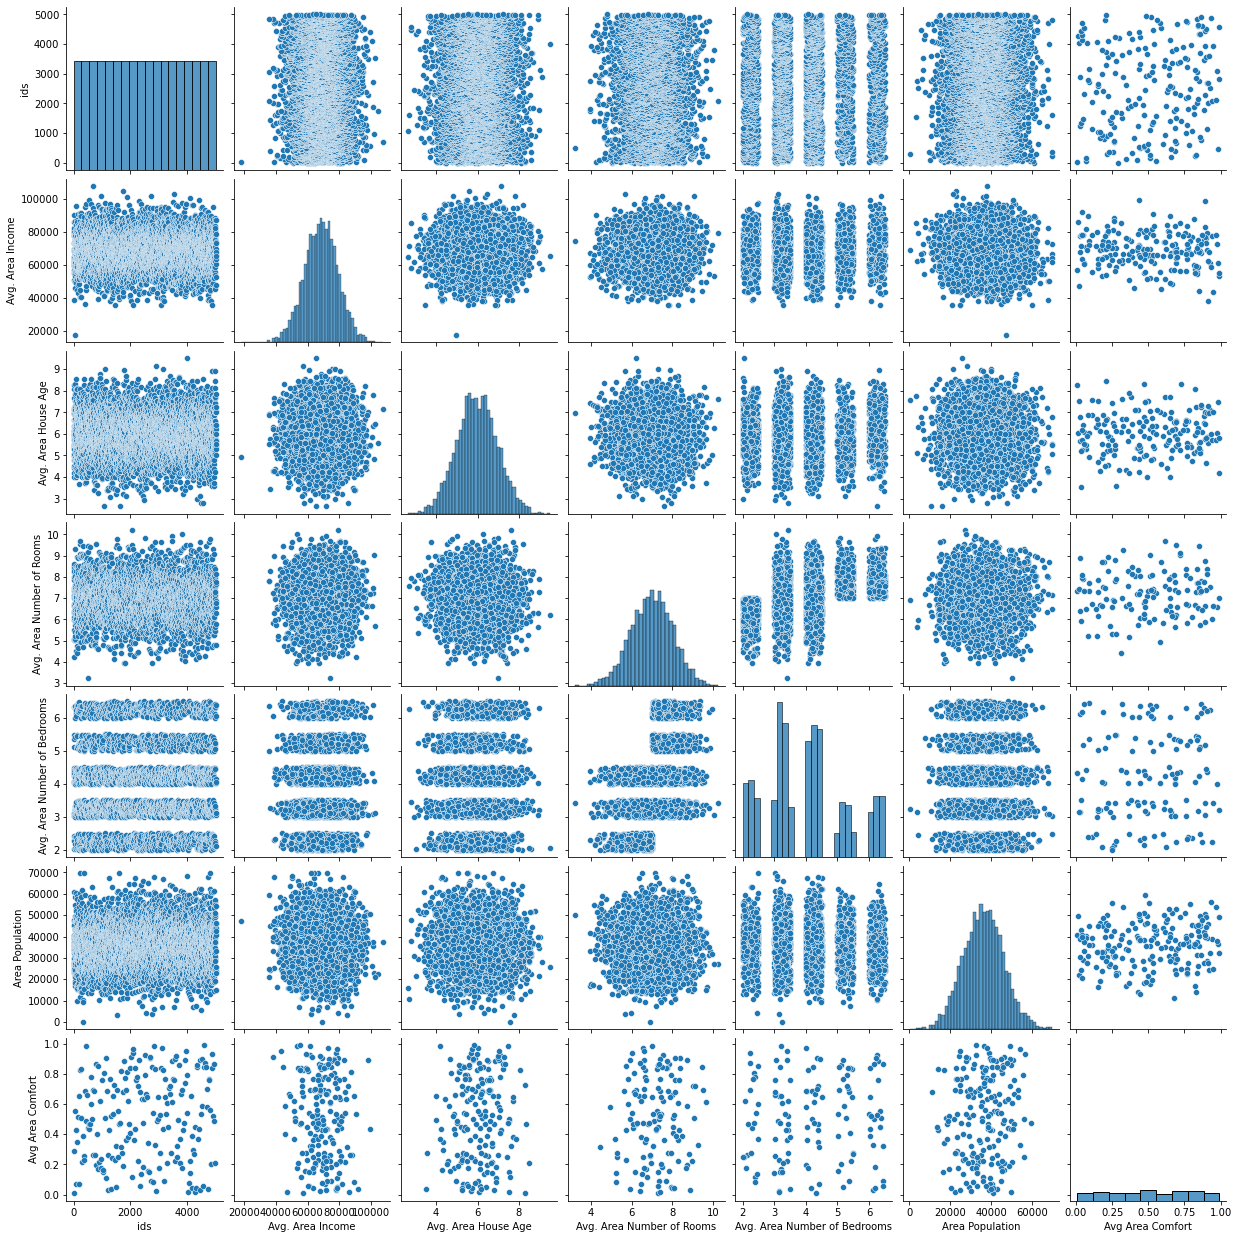

In [38]:
## Plotting pairplot:
sns.pairplot(df)

## Q:How would you handle outliers in the data, if any?
ans: 3 diff methods to handle outliers:

    1.the univariate method, 
    
    2.the multivariate method,
    
    3.and the Minkowski error.

In [39]:
##cheking for null values:
df.isnull().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                5
Avg. Area Number of Rooms       1667
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Address                            0
Avg Area Comfort                4800
dtype: int64

- the max no of missing values are present in the Avg Area Comfort i.e.4800

In [40]:
## Dropping the col Avg Area Comfort:
df.drop('Avg Area Comfort',axis=1,inplace=True)

## Q: How would you handle missing values, if any, in this dataset?

- the max no of missing values are present in the Avg Area Comfort i.e. 4800 
- by reading the data "Avg Area Comfort" is  not importatnt col for predictions.

In [41]:
df.isna().sum()

ids                                0
Avg. Area Income                   0
Avg. Area House Age                5
Avg. Area Number of Rooms       1667
Avg. Area Number of Bedrooms    1667
Area Population                    0
Price                              0
Address                            0
dtype: int64

In [42]:
df.Price.head(10)

0     $1059033.5578701235
1    Rs20078.545531292668
2     $1058987.9878760849
3    Rs16808.224088392624
4      $630943.4893385402
5    Rs14241.840991913738
6     $1502055.8173744078
7    Rs20985.820859702955
8      $798869.5328331633
9      Rs20602.0641685595
Name: Price, dtype: object

- Here we found the $ and Rs words in Price col.

In [43]:
df['Price']=df['Price'].str.replace("[$Rs]","")

- As we know the price col is numeric and the it;s dtype must be float64 thats why replacing $Rs.

In [44]:
# changing dtype of the col "Price"
df["Price"]=df["Price"].astype("float64")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ids                           5000 non-null   int64  
 1   Avg. Area Income              5000 non-null   float64
 2   Avg. Area House Age           4995 non-null   float64
 3   Avg. Area Number of Rooms     3333 non-null   float64
 4   Avg. Area Number of Bedrooms  3333 non-null   float64
 5   Area Population               5000 non-null   float64
 6   Price                         5000 non-null   float64
 7   Address                       5000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


## Q: What are some potential features you could engineer from the existing data to improve model performance?
ans:  some potential features could engineer from the existing data to improve model performance
Imputation. Imputation deals with handling missing values in data.

Discretization.

Categorical Encoding.

Feature Splitting.

Handling Outliers.

Variable Transformations.

Scaling.

Feature Creation in Machine Learning

In [46]:
from sklearn.impute import SimpleImputer
p = []

for i,a,b,c,d,e,f,g,h in df.itertuples():
    if(i%2==0):
        p.append(g)
    else:
        p.append(g*75)
        

In [47]:
df['Price']=p


In [48]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,3,63345.240046,7.188236,NaN,NaN,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [49]:
## checking address of the oth index.
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [50]:
def getstate(add):
    return add.split()[-2]

In [51]:
getstate('208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101')

'NE'

In [52]:
df['State']=df['Address'].apply(getstate)

In [53]:
df.drop('Address',axis=1,inplace=True)

In [54]:
df.head()

,ids,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,0,79545.458574,NaN,NaN,NaN,23086.800503,1.059034e+06,NE
1,1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,3,63345.240046,7.188236,NaN,NaN,34310.242831,1.260617e+06,AP
4,4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,AE


` Selection of X and Y : `

In [55]:
x = df.drop(["ids", "Price"], axis=1)
y = df["Price"]

## Q. What is the target variable in this case, and why is it important for prediction?
Ans: In this dataset the target variable is price. 

importance: The target variable is the feature of a dataset that you want to understand more clearly. It is the variable that the user would want to predict using the rest of the dataset. In most situations, a supervised machine learning algorithm is used to derive the target variable

In [56]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,State
0,79545.458574,NaN,NaN,NaN,23086.800503,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,WI
3,63345.240046,7.188236,NaN,NaN,34310.242831,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,AE
...,...,...,...,...,...,...
4995,60567.944140,7.830362,NaN,NaN,22837.361035,AP
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,AA
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,VA
4998,68001.331235,5.534388,NaN,NaN,42625.620156,AE


In [57]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## Q: How can you encode the categorical variable "Neighborhood" for machine learning?
ans:
   
   So the categorical data that needs to be encoded is converted into Numerical type by using LabelEncoder. Then passing it to the OneHotEncoder object and the output will be an Numpy array. It was one of the most preferred method. we have to convert data into o and 1 then we can do further predictions. 

In [58]:
x=x.values

In [59]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x[:, -2:]=oe.fit_transform(x[:, -2:])

- Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.

In [60]:
x

array([[79545.45857431678, nan, nan, nan, 468.0, 37.0],
       [79248.64245482568, 6.0028998082752425, 6.730821019094919, 3.09,
        3274.0, 8.0],
       [61287.067178656784, 5.865889840310001, 8.512727430375099, 5.13,
        2642.0, 59.0],
       ...,
       [63390.68688550463, 7.250590614779546, 4.805080980291155, 2.13,
        1941.0, 55.0],
       [68001.33123508695, 5.534388416220344, nan, nan, 3707.0, 1.0],
       [65510.581803666224, 5.992305307333977, 6.792336104424982, 4.07,
        4283.0, 41.0]], dtype=object)

In [61]:
## filling NAN values by mean:

In [62]:
from sklearn.impute import SimpleImputer

In [63]:
si = SimpleImputer(missing_values=np.nan, strategy="mean")

In [64]:
x=si.fit_transform(x)

In [65]:
x

array([[7.95454586e+04, 5.97681990e+00, 6.99441432e+00, 3.99808281e+00,
        4.68000000e+02, 3.70000000e+01],
       [7.92486425e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        3.27400000e+03, 8.00000000e+00],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        2.64200000e+03, 5.90000000e+01],
       ...,
       [6.33906869e+04, 7.25059061e+00, 4.80508098e+00, 2.13000000e+00,
        1.94100000e+03, 5.50000000e+01],
       [6.80013312e+04, 5.53438842e+00, 6.99441432e+00, 3.99808281e+00,
        3.70700000e+03, 1.00000000e+00],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.28300000e+03, 4.10000000e+01]])

In [66]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

` Model Selection: `

## Q: How would you split the dataset into training and testing sets? What is the purpose of this split?
ans: In this dataset i'm splitting in two parts like 80-20.

i'm using this splited dataset like 80% of the data for trainning purpose and remaining 20% data for the testing purpose.

In [67]:
# importing train_test_split from sklearn:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

## Q: What machine learning algorithms could you consider for this regression problem?
ans: In this prob. i'm using Linear regression, SVM, Random Forest.

# selction of model: 

` Model 1: `

# LinearRegression:

In [68]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 16175763958.415531
RMSE : 127183.97681475262
R2 : 0.8724779178079454


- Here we get the values of MSE,RMSE,R2 

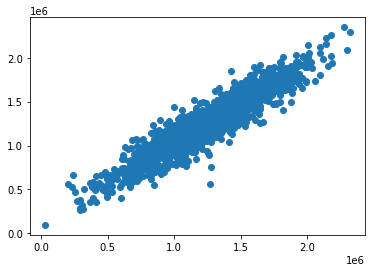

In [71]:
plt.scatter(ytest, ypred)

` Model 2: `

# Support Vector Machine:

In [72]:
# importing support vectore machine algorithm:
from sklearn.svm import SVR
svm = SVR()
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)

## Q: What evaluation metrics would you use to assess the performance of your regression model?
ans: For Regression analysis we use the "MSE","RMSE","R_score"

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 126808634690.92632
RMSE : 356102.000402871
R2 : 0.0003006239896612417


` Model 3: `

# RandomForest:

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")

MSE : 19496507419.83381
RMSE : 139629.89443465826
R2 : 0.8462987449593333


## Final Predictions:

In [86]:
print("Model no 1:")
print("LinearRegression Final Results:")
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")
print("-------------------------------------------------------")

print("Model no 2:")
print("Support vector machine Final Results:")
from sklearn.svm import SVR
svm = SVR()
svm.fit(xtrain, ytrain)
ypred = svm.predict(xtest)
from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")
print("--------------------------------------------------------")

print("Model no 3:")
print("Random Forest Final Results:")
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print(f"MSE : {mean_squared_error(ytest, ypred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(ytest, ypred))}")
print(f"R2 : {r2_score(ytest, ypred)}")
print("--------------------------------------------------------")
print("Thanks")

Model no 1:
LinearRegression Final Results:
MSE : 16175763958.415531
RMSE : 127183.97681475262
R2 : 0.8724779178079454
-------------------------------------------------------
Model no 2:
Support vector machine Final Results:
MSE : 126808634690.92632
RMSE : 356102.000402871
R2 : 0.0003006239896612417
--------------------------------------------------------
Model no 3:
Random Forest Final Results:
MSE : 19661891140.971375
RMSE : 140220.86556918474
R2 : 0.8449949378232777
--------------------------------------------------------
Thanks


## Conclusion: 
        I have use some machine learning algorithms like linear regression(0.8724), support vector machine(0.0003), random forest(0.8449) also, and after all observation we can conclude that my best model is linear Regression and r2 score is around 0.87.

## Q: Could you briefly outline the steps involved in building and evaluating a machine learning model for predicting house prices?
steps followd in this real estate pron soln:
    
    1.Data Collection and Preprocessing:
        
    2.EDA:
    
    3.data prepration:
    
    4.Data Viewzalization:
    
    5.Feature Selection/Engineering:
    
    6.Model Selection:
    
    7.Model Training:
    
    8.Evaluation:
        
        these are some stepps follwed in this dataset prob.

## Q: What are some potential challenges you might encounter when working with this dataset, and how would you address them?

Ans:I have faced some challenges during werking on this project like 

    1.Data preprocessing:
    
    2.i have found some special characters like,"?","$","&" so i have replaced it.